In [ ]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!git config --global user.email "tomastuberquia32@gmail.com"
!git config --global user.name "Boingabu"

In [ ]:
!git clone https://github.com/Boingabu/programacion_avanzada.git

Cloning into 'programacion_avanzada'...


In [ ]:
!ls

programacion_avanzada  sample_data


In [ ]:
!cp /content/Taller_optimizacion/content/programacion_avanzada/Taller_optimizacion.ipynb/content/algoritmos-optimizacion/

cp: missing destination file operand after '/content/Taller_optimizacion/content/programacion_avanzada/Taller_optimizacion.ipynb/content/algoritmos-optimizacion/'
Try 'cp --help' for more information.


In [ ]:
%cd /content/programacion_avanzada
!git add programacion_avanzada.iy
!git commit -m "Subiendo archivo desde Colab"
!git push origin main

/content/programacion_avanzada
fatal: pathspec 'programacion_avanzada.iy' did not match any files
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Boingabu/programacion_avanzada.git'


problema #1

Caso de Prueba 1
Objetos seleccionados: ['Objeto 1', 'Objeto 2']
Valor total: 7

Caso de Prueba 2
Objetos seleccionados: ['Objeto 2', 'Objeto 3']
Valor total: 220

Caso de Prueba 3
Objetos seleccionados: ['Objeto 1', 'Objeto 3', 'Objeto 4']
Valor total: 5500

Caso de Prueba 4
Objetos seleccionados: ['Objeto 1', 'Objeto 3', 'Objeto 4', 'Objeto 5']
Valor total: 26

Caso de Prueba 5
Objetos seleccionados: ['Objeto 1', 'Objeto 3']
Valor total: 40



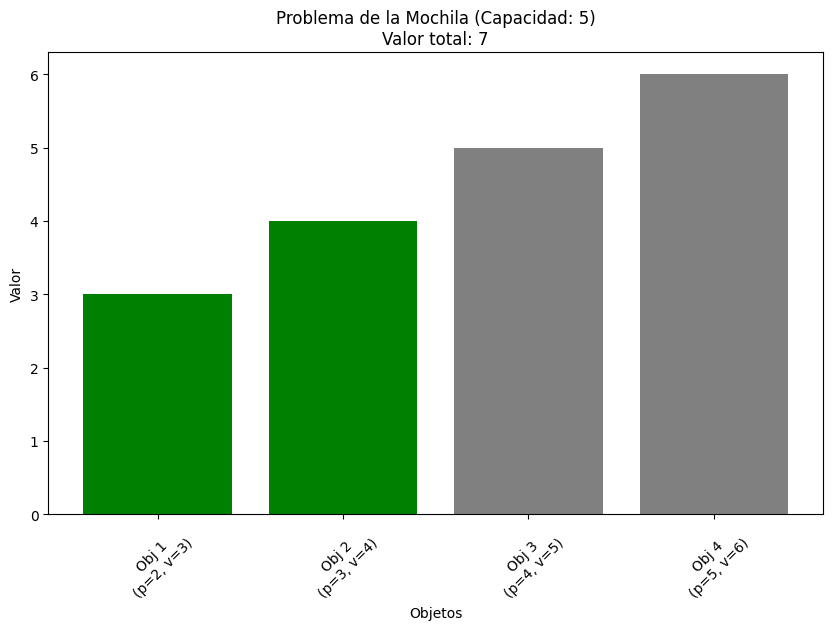

In [ ]:
def mochila(capacidad, pesos, valores, n):
    # Creamos una tabla para almacenar los valores máximos
    K = [[0 for _ in range(capacidad + 1)] for _ in range(n + 1)]

    # Construimos la tabla K[][] de abajo hacia arriba
    for i in range(n + 1):
        for w in range(capacidad + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif pesos[i-1] <= w:
                K[i][w] = max(valores[i-1] + K[i-1][w-pesos[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]

    # Reconstruimos la solución para saber qué objetos se seleccionaron
    res = K[n][capacidad]
    w = capacidad
    objetos_seleccionados = []

    for i in range(n, 0, -1):
        if res <= 0:
            break
        if res == K[i-1][w]:
            continue
        else:
            objetos_seleccionados.append(i)
            res -= valores[i-1]
            w -= pesos[i-1]

    return K[n][capacidad], sorted(objetos_seleccionados)

# Casos de prueba
casos = [
    {"pesos": [2, 3, 4, 5], "valores": [3, 4, 5, 6], "capacidad": 5},
    {"pesos": [10, 20, 30], "valores": [60, 100, 120], "capacidad": 50},
    {"pesos": [1, 4, 3, 1], "valores": [1500, 3000, 2000, 2000], "capacidad": 5},
    {"pesos": [2, 3, 4, 5, 9], "valores": [3, 4, 5, 8, 10], "capacidad": 20},
    {"pesos": [1, 2, 3, 4], "valores": [10, 20, 30, 40], "capacidad": 4}
]

for i, caso in enumerate(casos, 1):
    valor, objetos = mochila(caso["capacidad"], caso["pesos"], caso["valores"], len(caso["pesos"]))
    print(f"Caso de Prueba {i}")
    print(f"Objetos seleccionados: {[f'Objeto {o}' for o in objetos]}")
    print(f"Valor total: {valor}\n")

import matplotlib.pyplot as plt
import numpy as np

def mochila_grafico(pesos, valores, capacidad):
    n = len(pesos)
    K = [[0 for _ in range(capacidad + 1)] for _ in range(n + 1)]

    # Llenar la tabla de programación dinámica
    for i in range(n + 1):
        for w in range(capacidad + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif pesos[i-1] <= w:
                K[i][w] = max(valores[i-1] + K[i-1][w-pesos[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]

    # Reconstruir la solución
    res = K[n][capacidad]
    w = capacidad
    seleccionados = []
    for i in range(n, 0, -1):
        if res <= 0:
            break
        if res != K[i-1][w]:
            seleccionados.append(i-1)
            res -= valores[i-1]
            w -= pesos[i-1]

    # Visualización
    fig, ax = plt.subplots(figsize=(10, 6))
    objetos = [f'Obj {i+1}\n(p={pesos[i]}, v={valores[i]})' for i in range(n)]
    colores = ['green' if i in seleccionados else 'gray' for i in range(n)]

    ax.bar(objetos, valores, color=colores)
    ax.set_xlabel('Objetos')
    ax.set_ylabel('Valor')
    ax.set_title(f'Problema de la Mochila (Capacidad: {capacidad})\nValor total: {K[n][capacidad]}')
    plt.xticks(rotation=45)
    plt.show()

# Ejemplo de uso
pesos = [2, 3, 4, 5]
valores = [3, 4, 5, 6]
capacidad = 5
mochila_grafico(pesos, valores, capacidad)

In [ ]:
import heapq
from collections import defaultdict

def dijkstra_con_rutas(grafo, inicio, fin):
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0

    arcos = {nodo: float('inf') for nodo in grafo}
    arcos[inicio] = 0

    rutas = defaultdict(list)
    rutas[inicio] = [[inicio]]

    cola = [(0, 0, inicio)]

    while cola:
        dist_actual, arcos_actual, nodo_actual = heapq.heappop(cola)

        if nodo_actual == fin:
            continue

        for vecino, peso in grafo[nodo_actual].items():
            distancia = dist_actual + peso
            num_arcos = arcos_actual + 1

            if distancia < distancias[vecino]:
                distancias[vecino] = distancia
                arcos[vecino] = num_arcos
                rutas[vecino] = [ruta + [vecino] for ruta in rutas[nodo_actual]]
                heapq.heappush(cola, (distancia, num_arcos, vecino))

            elif distancia == distancias[vecino] and num_arcos < arcos[vecino]:
                arcos[vecino] = num_arcos
                rutas[vecino] = [ruta + [vecino] for ruta in rutas[nodo_actual]]
                heapq.heappush(cola, (distancia, num_arcos, vecino))

            elif distancia == distancias[vecino] and num_arcos == arcos[vecino]:
                rutas[vecino].extend([ruta + [vecino] for ruta in rutas[nodo_actual]])

    rutas_unicas = []
    for ruta in rutas[fin]:
        if ruta not in rutas_unicas:
            rutas_unicas.append(ruta)

    return distancias[fin], rutas_unicas
grafo = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

peso_total, caminos = dijkstra_con_rutas(grafo, 'A', 'D')
print(f"Peso total mínimo: {peso_total}")
print("Rutas óptimas:")
for camino in caminos:
    print(" -> ".join(camino))

Peso total mínimo: 4
Rutas óptimas:
A -> B -> C -> D


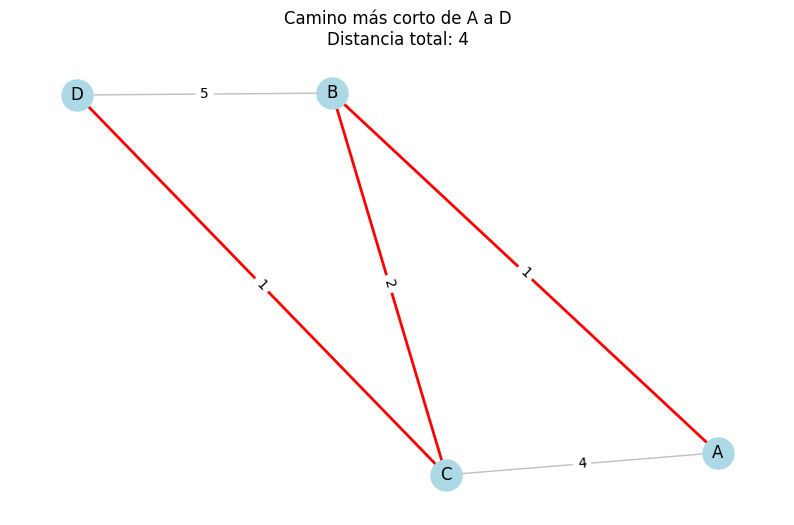

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_grafico(grafo, inicio, fin):
    G = nx.Graph()
    for nodo in grafo:
        for vecino, peso in grafo[nodo].items():
            G.add_edge(nodo, vecino, weight=peso)

    camino_mas_corto = nx.shortest_path(G, inicio, fin, weight='weight')
    distancia = nx.shortest_path_length(G, inicio, fin, weight='weight')

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(G, pos)

    edges_camino = [(camino_mas_corto[i], camino_mas_corto[i+1]) for i in range(len(camino_mas_corto)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges_camino, edge_color='red', width=2)

    otras_edges = [edge for edge in G.edges() if edge not in edges_camino]
    nx.draw_networkx_edges(G, pos, edgelist=otras_edges, edge_color='gray', alpha=0.5)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f'Camino más corto de {inicio} a {fin}\nDistancia total: {distancia}')
    plt.axis('off')
    plt.show()

grafo = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}
dijkstra_grafico(grafo, 'A', 'D')